<a href="https://colab.research.google.com/github/LuvinaD/Diet_Plan-/blob/master/FoodRecognitionCalorieEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf

In [1]:
# 2. Check GPU Access
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.18.0
/device:GPU:0


In [5]:
def get_data_extract():
  import os # Import os module within the function
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [6]:
# Download data and extract it to folder

get_data_extract()

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

In [7]:
# Check dataset folder
!ls food-101/

images	license_agreement.txt  meta  README.txt


In [8]:
import os
os.listdir('food-101/images')

['cannoli',
 'peking_duck',
 'tiramisu',
 'panna_cotta',
 'lobster_roll_sandwich',
 'baklava',
 'guacamole',
 'tuna_tartare',
 'lasagna',
 'macaroni_and_cheese',
 'ceviche',
 'paella',
 'pulled_pork_sandwich',
 'club_sandwich',
 'sushi',
 'fried_rice',
 'beef_carpaccio',
 'edamame',
 'gnocchi',
 'beef_tartare',
 'beet_salad',
 'french_fries',
 'shrimp_and_grits',
 'fish_and_chips',
 'baby_back_ribs',
 'creme_brulee',
 'chicken_quesadilla',
 'filet_mignon',
 'miso_soup',
 'cup_cakes',
 'mussels',
 'french_onion_soup',
 'bruschetta',
 'greek_salad',
 'prime_rib',
 'tacos',
 'crab_cakes',
 'red_velvet_cake',
 'french_toast',
 'hot_dog',
 'chocolate_mousse',
 'cheesecake',
 'frozen_yogurt',
 'hot_and_sour_soup',
 'spring_rolls',
 'takoyaki',
 'churros',
 'hummus',
 'grilled_cheese_sandwich',
 'escargots',
 'waffles',
 'chicken_curry',
 'chocolate_cake',
 'chicken_wings',
 'carrot_cake',
 'apple_pie',
 'spaghetti_bolognese',
 'cheese_plate',
 'eggs_benedict',
 'sashimi',
 'donuts',
 'omelet

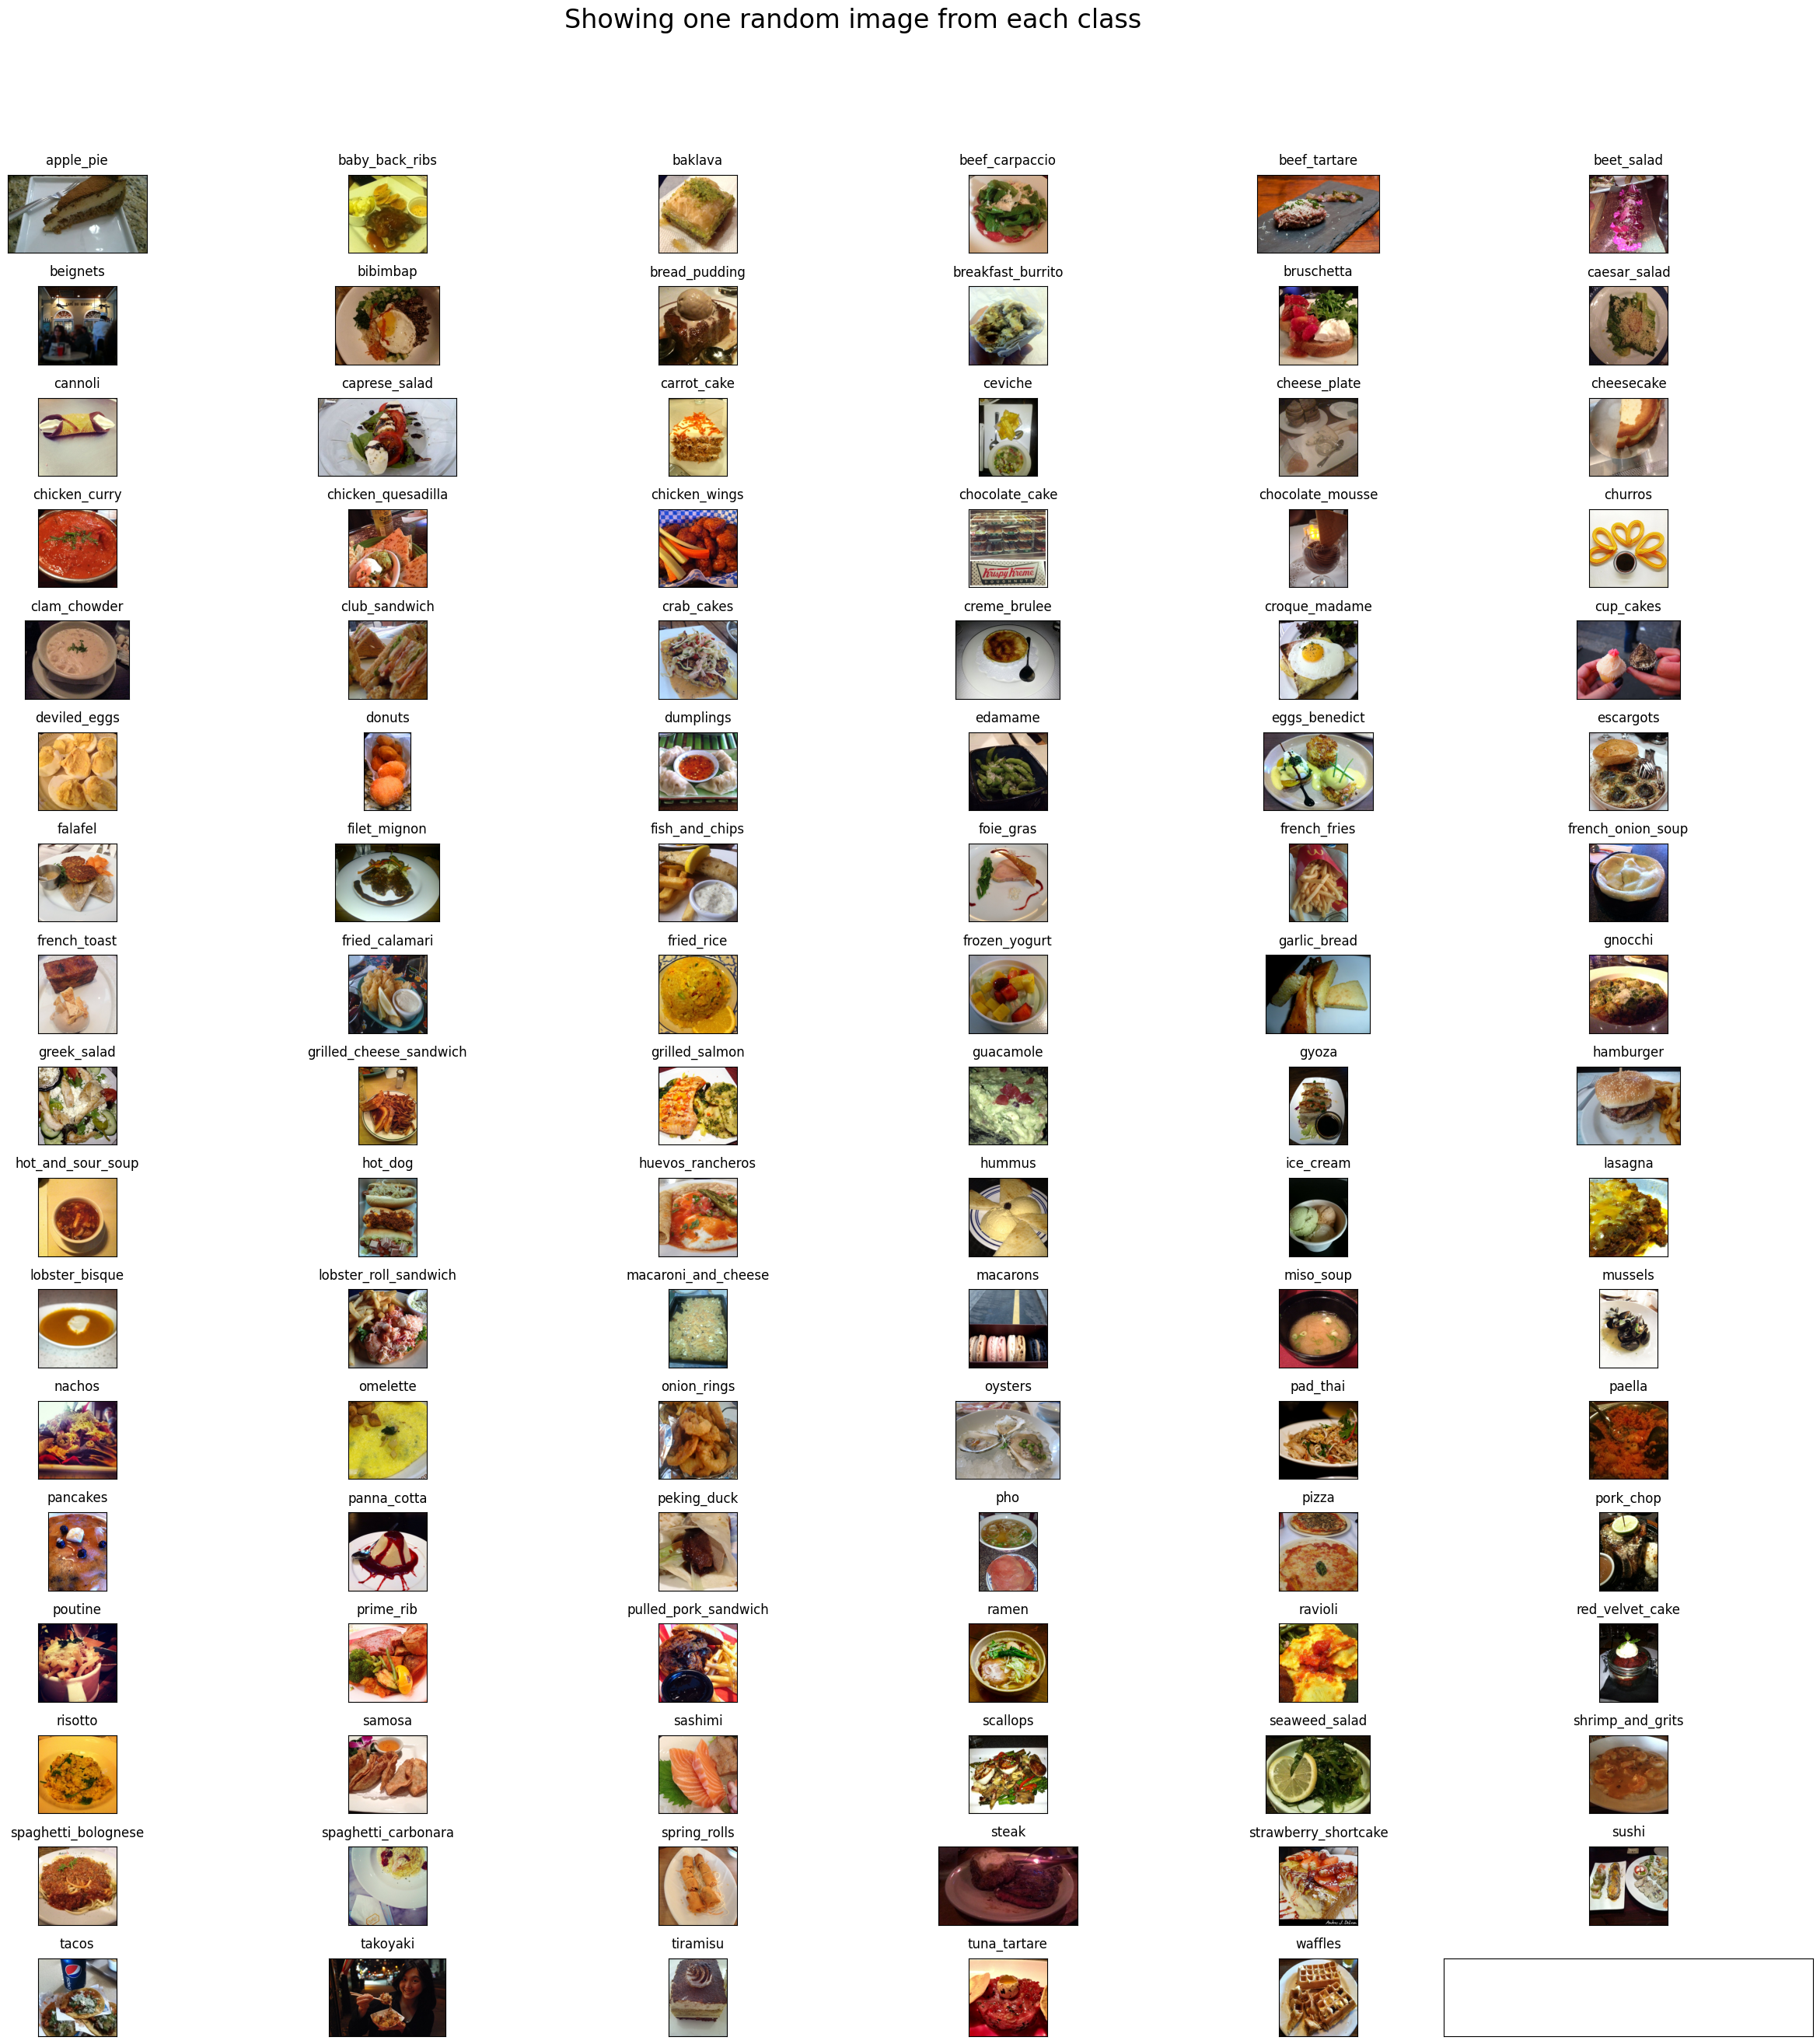

In [10]:
# showing one image per class from 101 classes
import matplotlib.pyplot as plt
import os
import numpy as np

rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) #Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) #returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) #picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
#https://matplotlib.org/users/tight_layout_guide.html